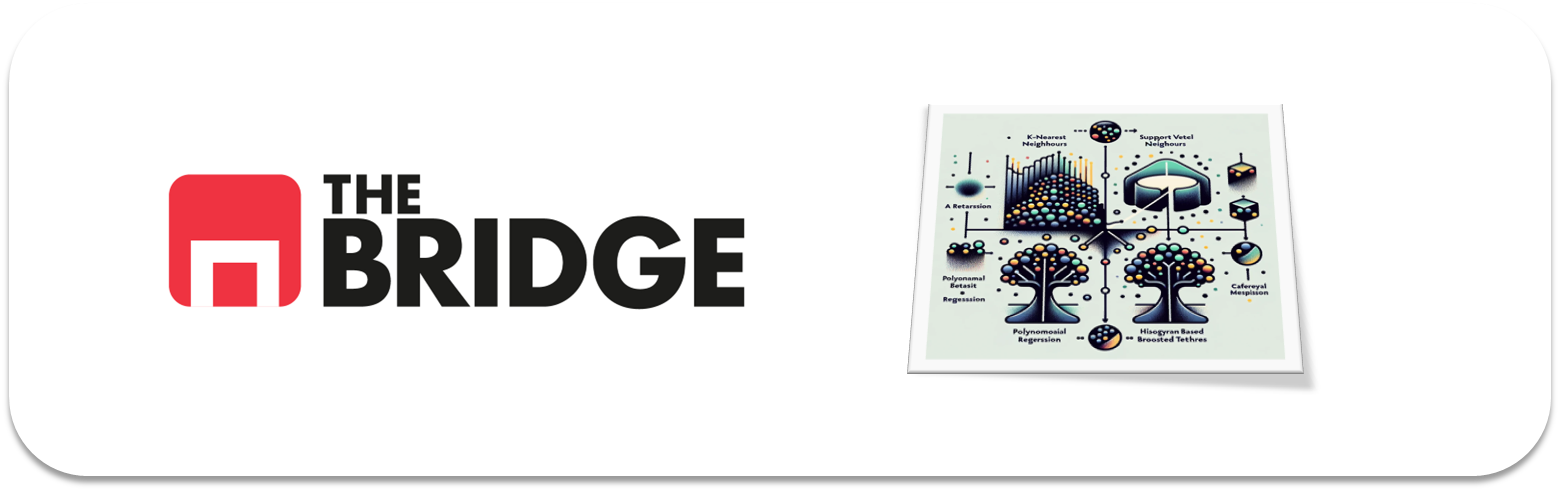

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [3]:
df = pd.read_csv('./data/wines_dataset.csv',sep='|')
df.columns = df.columns.str.replace(' ', '_')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
target = 'quality'

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
df_train[target].value_counts()

quality
6    2274
5    1706
7     869
4     173
8     146
3      24
9       5
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='Probability'>

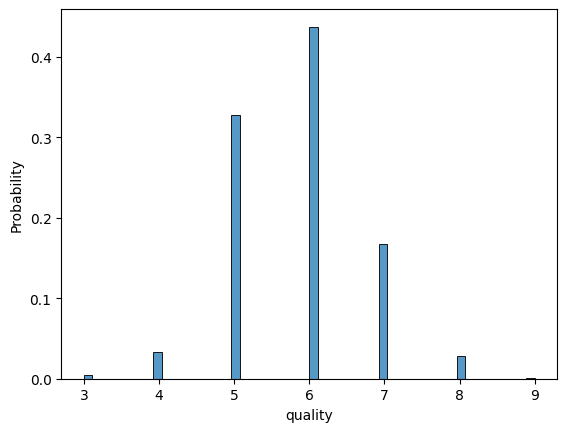

In [9]:
sns.histplot(df_train [target], stat='probability',kde=False)

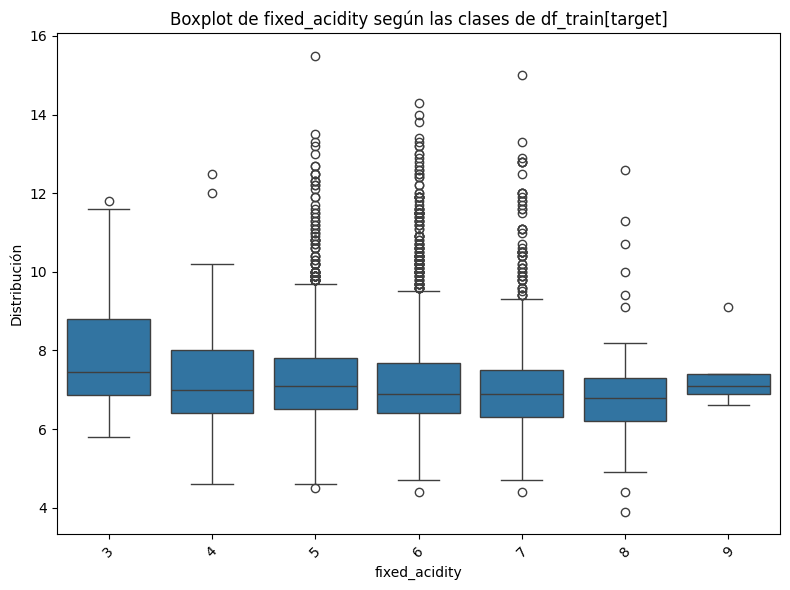

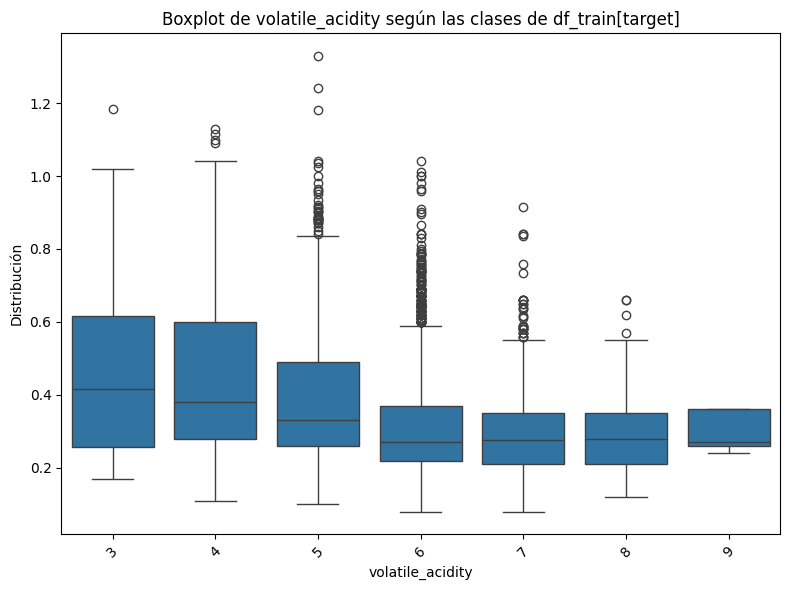

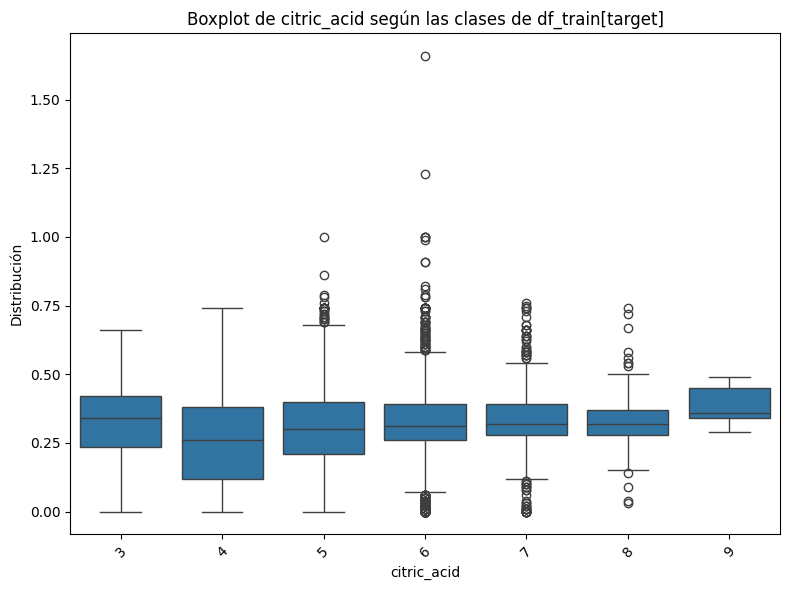

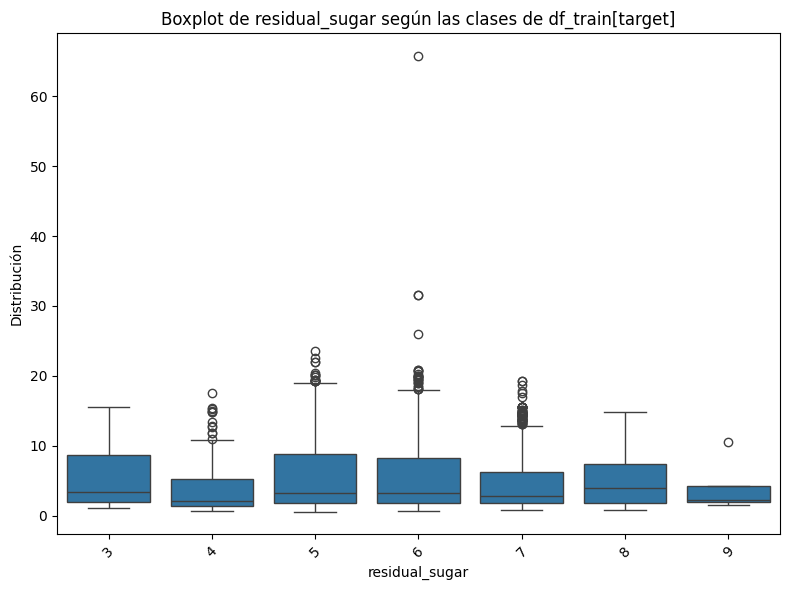

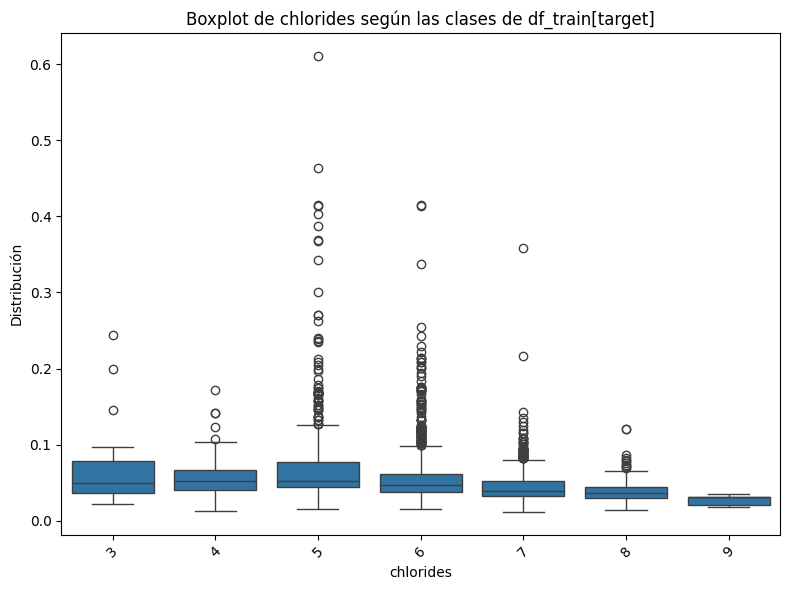

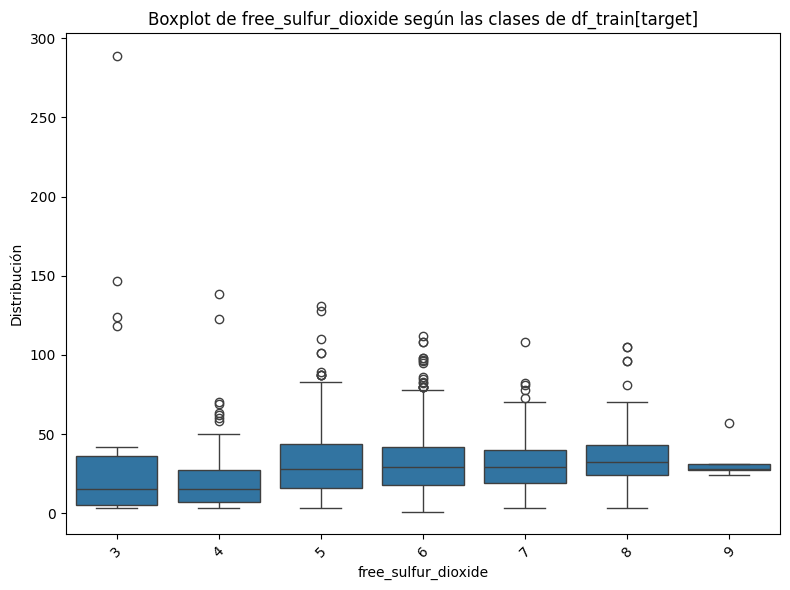

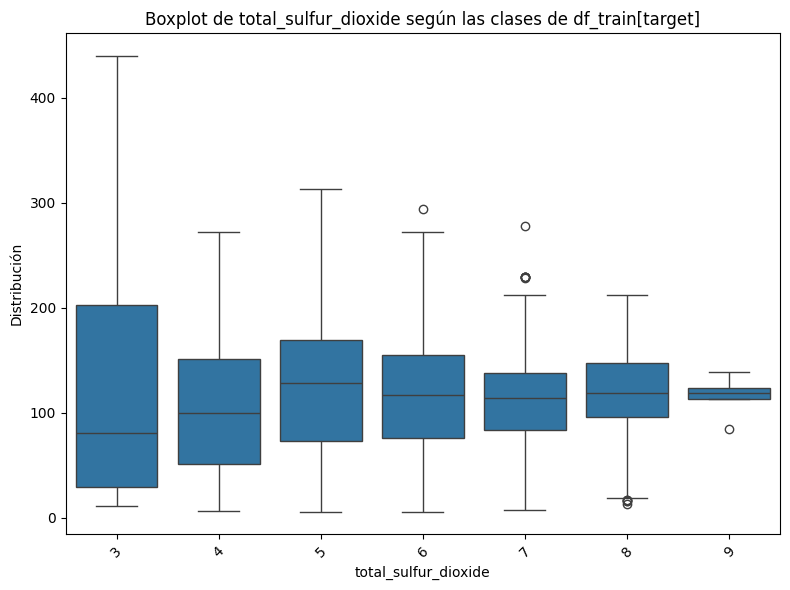

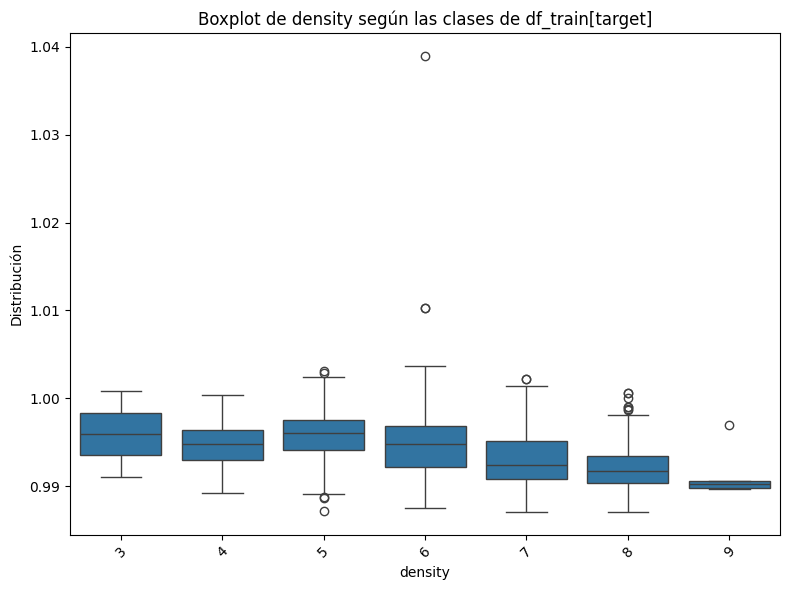

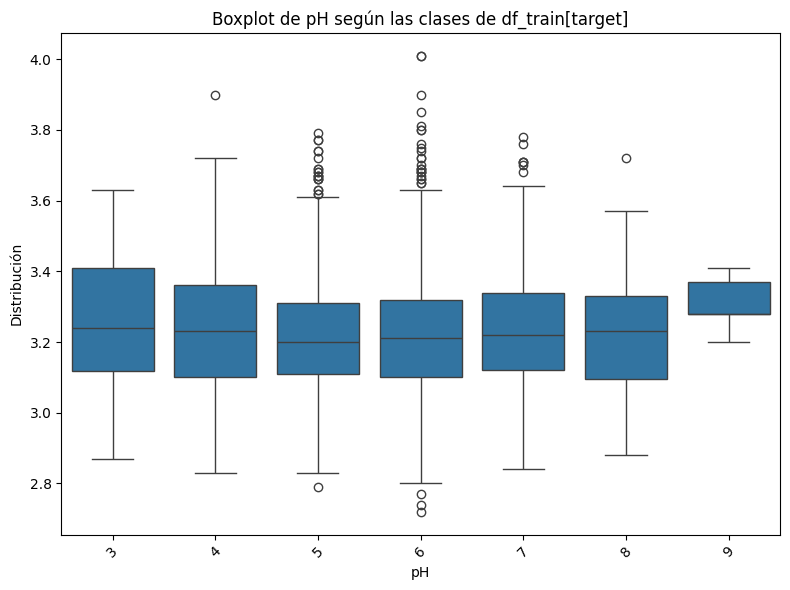

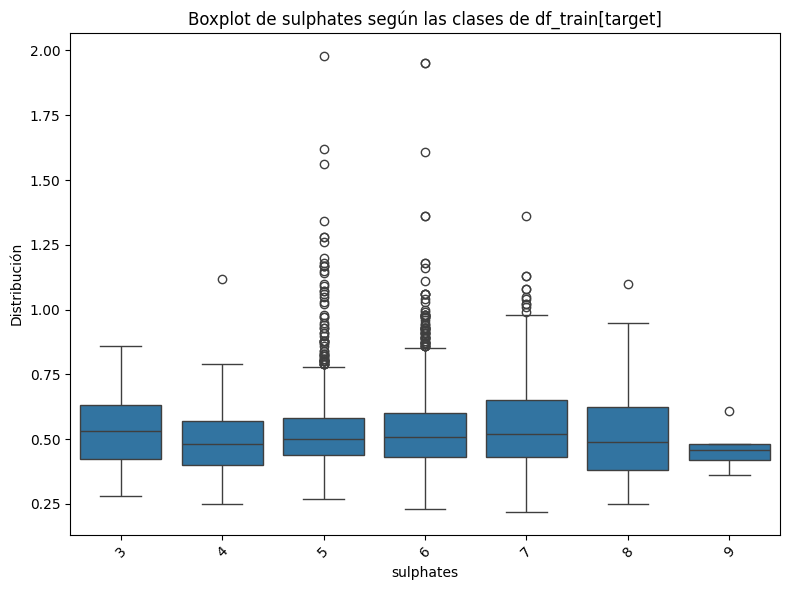

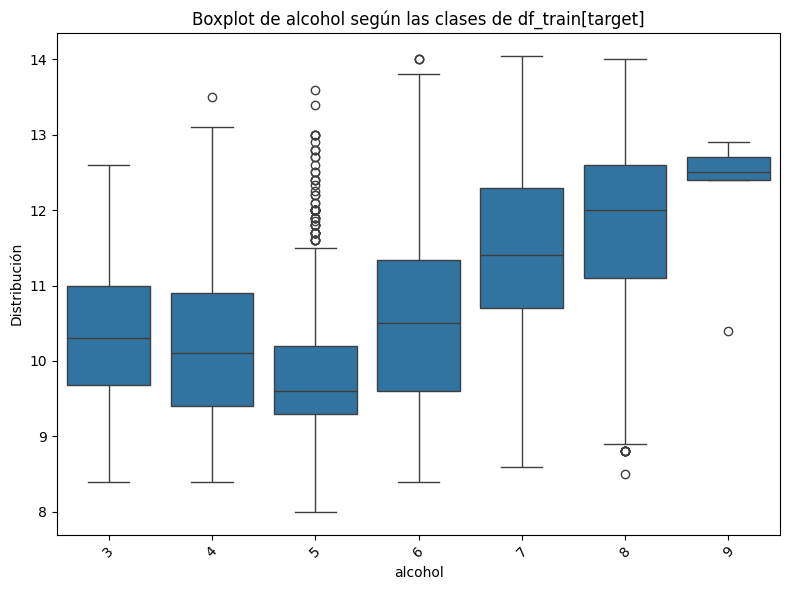

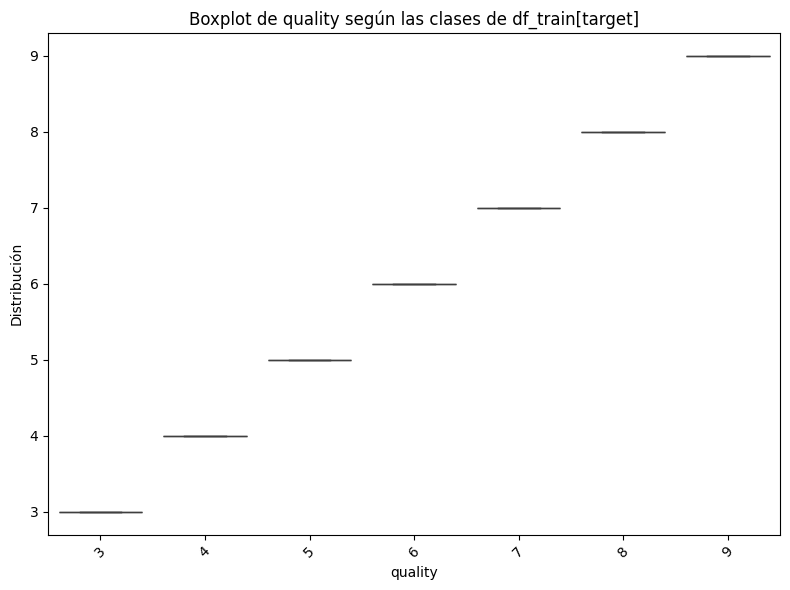

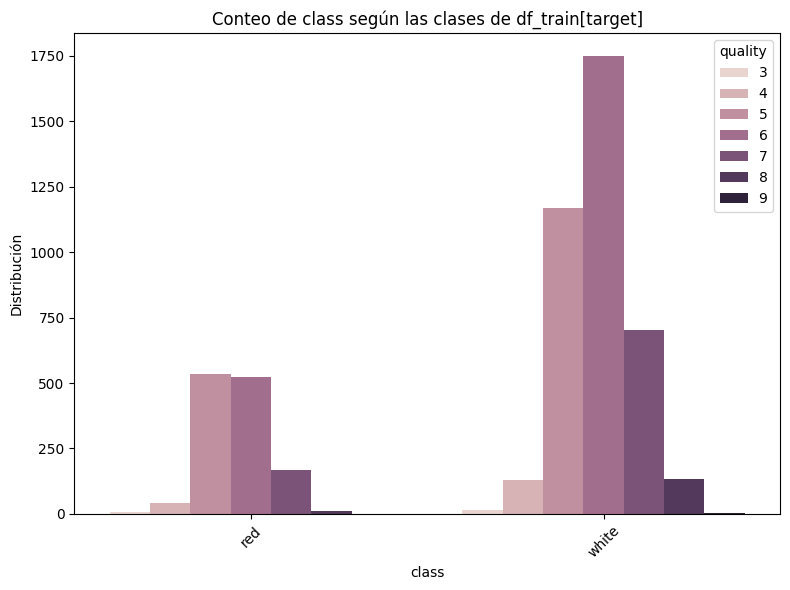

In [10]:

# Iterar sobre las columnas de df_train y graficarlas contra df_train[target]
for variable in df_train.columns:
    plt.figure(figsize=(8, 6))
    # Si la variable es numérica
    if df_train[variable].dtype in ['int64', 'float64']:
        if df_train[target].nunique() <= 10:  # Si el target es categórico (10 clases o menos)
            sns.boxplot(x=df_train[target], y=df_train[variable])
            plt.title(f'Boxplot de {variable} según las clases de df_train[target]')
        else:  # Si el target es continuo
            sns.scatterplot(x=df_train[variable], y=df_train[target])
            plt.title(f'Distribución de {variable} frente a df_train[target]')
    else:  # Si la variable es categórica
        sns.countplot(x=df_train[variable], hue=df_train[target])
        plt.title(f'Conteo de {variable} según las clases de df_train[target]')
    
    # Configuración del gráfico
    plt.xlabel(variable)
    plt.ylabel('Distribución')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
df_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5,red
947,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,6,white
877,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,6,white
2927,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6,white
6063,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,9.3,5,white
5191,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,9.4,5,white
5226,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7,white
5390,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,8,white


In [12]:
from sklearn.preprocessing import LabelBinarizer

# Convertir la columna 'class' en binaria
lb = LabelBinarizer()
df_train['class'] = lb.fit_transform(df_train['class'])

In [13]:
features = df_train.drop(columns=['quality', 'residual_sugar', 'free_sulfur_dioxide']).columns.tolist()


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

In [15]:
# Instanciar el escalador
scaler = StandardScaler()

# Ajustar y transformar X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transformar X_test
X_test_scaled = scaler.transform(X_test)

Evaluando modelo: Logistic Regression...
Evaluando modelo: SVC...
Evaluando modelo: Decision Tree...
Evaluando modelo: Random Forest...
Evaluando modelo: KNN...
Evaluando modelo: Gradient Boosting...
Evaluando modelo: AdaBoost...
Evaluando modelo: XGBoost...
Error con el modelo XGBoost: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
 

C:\Users\rodri\AppData\Local\Temp\ipykernel_16592\2273844140.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy Media", y="Modelo", data=resultados_df, palette="viridis", hue=None)


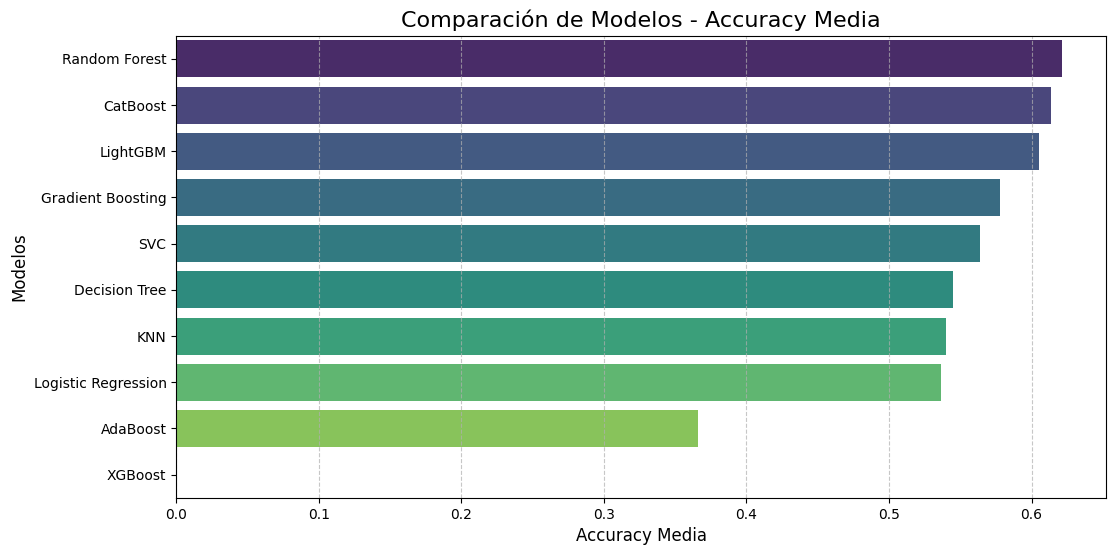

In [16]:
# Definir los modelos
model_names = [
    "Logistic Regression", "SVC", "Decision Tree", "Random Forest", "KNN", 
    "Gradient Boosting", "AdaBoost", "XGBoost", "LightGBM", "CatBoost"
]
model_set = [
    LogisticRegression(max_iter=10000),
    SVC(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    LGBMClassifier(random_state=42, verbose=-100),
    CatBoostClassifier(random_state=42, verbose=False, train_dir='./catboost_temp_fix')
]

# Evaluar modelos con cross-validation
metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(f"Evaluando modelo: {nombre}...")
    try:
        # Calcular cross-validation
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
        metricas_cv[nombre] = scores
        valores.append(np.mean(scores))
    except Exception as e:
        print(f"Error con el modelo {nombre}: {e}")
        metricas_cv[nombre] = None
        valores.append(-np.inf)

# Encontrar el modelo ganador
ganador = model_names[np.argmax(valores)]
print(f"\nEl modelo ganador es: {ganador} con una accuracy media de {np.max(valores):.4f}\n")

# Mostrar los resultados en un DataFrame
resultados_df = pd.DataFrame({
    "Modelo": model_names,
    "Accuracy Media": valores
}).sort_values(by="Accuracy Media", ascending=False)

print(resultados_df)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy Media", y="Modelo", data=resultados_df, palette="viridis", hue=None)
plt.title("Comparación de Modelos - Accuracy Media", fontsize=16)
plt.xlabel("Accuracy Media", fontsize=12)
plt.ylabel("Modelos", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [17]:
# Espacios de búsqueda para cada modelo
parametros = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    "CatBoost": {
        'iterations': [100, 200, 300],
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'l2_leaf_reg': [3, 5, 7]
    },
"LightGBM": {
    'num_leaves': [50, 75, 100],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [200, 250, 300],  
    'max_depth': [10, 12, 16]  
}
    # "XGBoost": {
    #     'n_estimators': [100, 200, 300],
    #     'max_depth': [3, 6, 10],
    #     'learning_rate': [0.01, 0.05, 0.1],
    #     'subsample': [0.7, 0.9, 1.0]
    # }
}

# Definir modelos
modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=False),
    "LightGBM": LGBMClassifier(random_state=42),
    #"XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

# Ajuste de hiperparámetros con GridSearchCV
resultados_ajuste = {}
for nombre, modelo in modelos.items():
    print(f"Optimización de hiperparámetros para {nombre}...")
    grid_search = GridSearchCV(
        estimator=modelo,
        param_grid=parametros[nombre],
        cv=3,  # Validación cruzada
        scoring='accuracy',
        n_jobs=-1  # Paralelización
    )
    grid_search.fit(X_train_scaled, y_train)
    resultados_ajuste[nombre] = grid_search

    # Mostrar los mejores resultados
    print(f"Mejores hiperparámetros para {nombre}: {grid_search.best_params_}")
    print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

# Guardar los modelos optimizados
modelos_optimizados = {nombre: resultados_ajuste[nombre].best_estimator_ for nombre in resultados_ajuste}


Optimización de hiperparámetros para Random Forest...


Mejores hiperparámetros para Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor accuracy en validación cruzada: 0.6300
Optimización de hiperparámetros para CatBoost...


c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, us

Mejores hiperparámetros para CatBoost: {'depth': 10, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Mejor accuracy en validación cruzada: 0.6255
Optimización de hiperparámetros para LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 10
[LightGBM] [Info] Start training from score -5.442177
[LightGBM] [Info] Start training from score -3.449747
[LightGBM] [Info] Start training from score -1.109983
[LightGBM] [Info] Start training from score -0.839232
[LightGBM] [Info] Start training from score -1.760266
[LightGBM] [Info] Start training from score -3.520365
[LightGBM] [Info] Start training from score -7.233937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [18]:
# Evaluar cada modelo optimizado
for nombre, modelo in modelos_optimizados.items():
    print(f"Evaluación en Test para {nombre}...")
    y_pred_test = modelo.predict(X_test_scaled)
    accuracy_test_renumerado = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy en Test: {accuracy_test_renumerado:.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_test))


Evaluación en Test para Random Forest...
Accuracy en Test: 0.6529

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        41
           5       0.70      0.68      0.69       336
           6       0.63      0.78      0.70       478
           7       0.62      0.49      0.55       154
           8       0.67      0.17      0.28        23
           9       0.00      0.00      0.00         2

    accuracy                           0.65      1040
   macro avg       0.52      0.31      0.32      1040
weighted avg       0.66      0.65      0.63      1040

Evaluación en Test para CatBoost...
Accuracy en Test: 0.6173

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        41
           5       0.65      0.65      0.65       336
     

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy en Test: 0.6433

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.05      0.09        41
           5       0.67      0.69      0.68       336
           6       0.64      0.74      0.69       478
           7       0.59      0.51      0.55       154
           8       0.57      0.17      0.27        23
           9       0.00      0.00      0.00         2

    accuracy                           0.64      1040
   macro avg       0.42      0.31      0.32      1040
weighted avg       0.63      0.64      0.63      1040



c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


               Accuracy Test
Random Forest       0.459615
CatBoost            0.459615
LightGBM            0.005769


C:\Users\rodri\AppData\Local\Temp\ipykernel_16592\2826295439.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy Test", y=resultados_test_df.index, data=resultados_test_df, palette="viridis", hue=None)


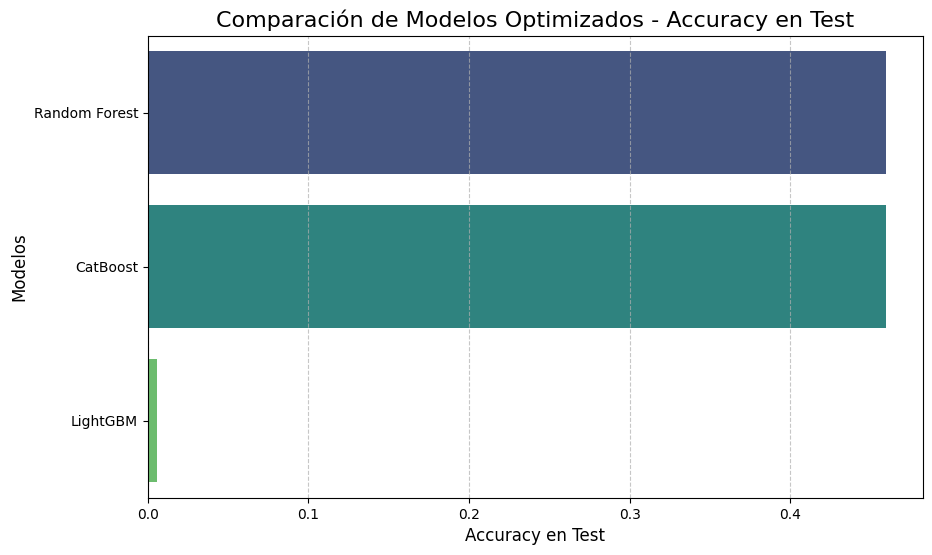

In [19]:
# Comparar desempeño en test
resultados_test = {
    nombre: accuracy_score(y_test, modelo.predict(X_test))
    for nombre, modelo in modelos_optimizados.items()
}

# Convertir resultados a DataFrame
resultados_test_df = pd.DataFrame.from_dict(resultados_test, orient='index', columns=['Accuracy Test']).sort_values(by='Accuracy Test', ascending=False)

# Visualizar resultados
print(resultados_test_df)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy Test", y=resultados_test_df.index, data=resultados_test_df, palette="viridis", hue=None)
plt.title("Comparación de Modelos Optimizados - Accuracy en Test", fontsize=16)
plt.xlabel("Accuracy en Test", fontsize=12)
plt.ylabel("Modelos", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Matriz de Confusión:
 [[  0   0   3   3   0   0   0]
 [  0   1  15  23   2   0   0]
 [  0   0 227 104   5   0   0]
 [  0   0  77 371  29   1   0]
 [  0   0   3  74  76   1   0]
 [  0   0   0  11   8   4   0]
 [  0   0   0   0   2   0   0]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        41
           5       0.70      0.68      0.69       336
           6       0.63      0.78      0.70       478
           7       0.62      0.49      0.55       154
           8       0.67      0.17      0.28        23
           9       0.00      0.00      0.00         2

    accuracy                           0.65      1040
   macro avg       0.52      0.31      0.32      1040
weighted avg       0.66      0.65      0.63      1040



c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

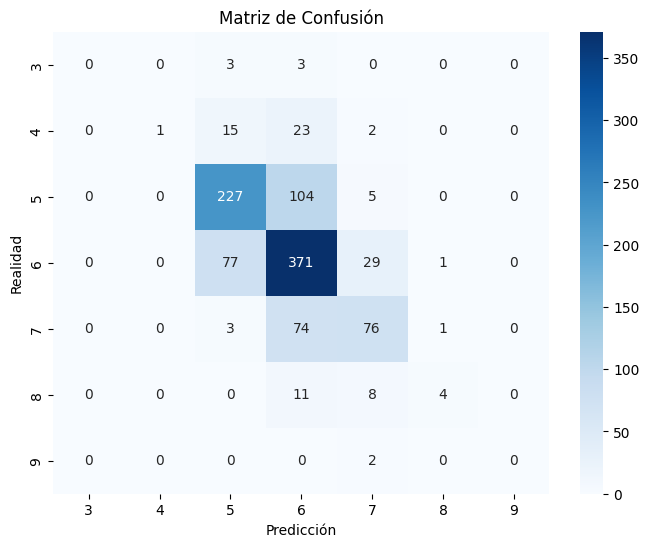

In [20]:
best_model = RandomForestClassifier(bootstrap = True, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)
best_model.fit(X_train_scaled, y_train)
# Para el modelo con el mejor rendimiento
y_pred = best_model.predict(X_test_scaled)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte de clasificación con precisión, recall y F1-score
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4','5','6','7','8','9'], yticklabels=['3', '4','5','6','7','8','9'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

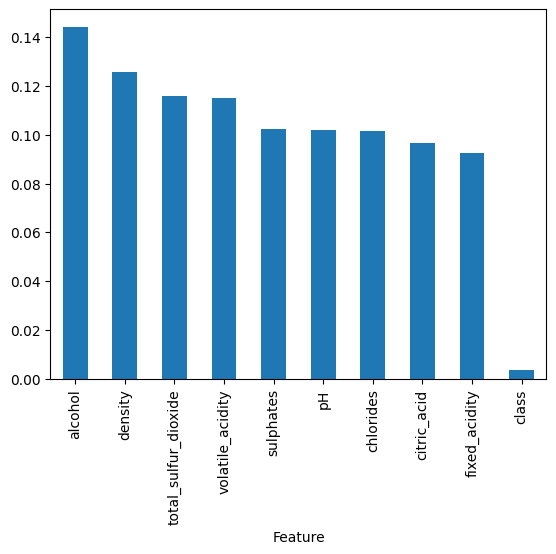

In [21]:
feature_importances = best_model.feature_importances_
features = X_train.columns

# Ordena las características por importancia
feat_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Visualiza las características más importantes
feat_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.show()

In [23]:
columnas = X_train.columns  # Guardamos los nombres de las columnas originales
X_train_reduced = pd.DataFrame(X_train_scaled, columns=columnas).drop(columns=['class'])
X_test_reduced = pd.DataFrame(X_test_scaled, columns=columnas).drop(columns=['class'])

In [24]:
from imblearn.over_sampling import SMOTE

# Verifica el número de muestras en X_train_reduced
n_samples = len(X_train_reduced)
print(f"Cantidad de muestras en el conjunto de entrenamiento: {n_samples}")

# Ajustar el valor de k_neighbors a un número adecuado
smote = SMOTE(random_state=42, k_neighbors=min(2, n_samples - 1))

# Aplica SMOTE tanto a las características (X) como a la variable objetivo (y)
X_train_res, y_train_res = smote.fit_resample(X_train_reduced, y_train)

# Verifica la distribución de clases después de SMOTE
print(f"Distribución de clases en y_train después de SMOTE: {pd.Series(y_train_res).value_counts()}")


Cantidad de muestras en el conjunto de entrenamiento: 4157
Distribución de clases en y_train después de SMOTE: quality
6    1796
7    1796
5    1796
3    1796
8    1796
4    1796
9    1796
Name: count, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Instancia y ajusta el modelo con los datos balanceados
rf_model = RandomForestClassifier(bootstrap = True, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy en test: 0.6356


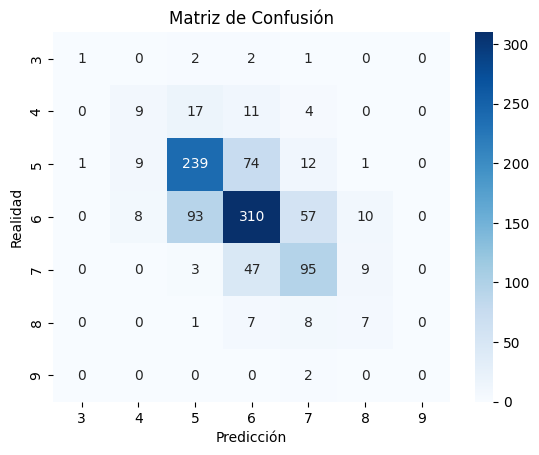


Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.50      0.17      0.25         6
           4       0.35      0.22      0.27        41
           5       0.67      0.71      0.69       336
           6       0.69      0.65      0.67       478
           7       0.53      0.62      0.57       154
           8       0.26      0.30      0.28        23
           9       0.00      0.00      0.00         2

    accuracy                           0.64      1040
   macro avg       0.43      0.38      0.39      1040
weighted avg       0.63      0.64      0.63      1040



c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:

# Predicciones con el modelo entrenado
y_pred = rf_model.predict(X_test_reduced)

# Accuracy
print(f"Accuracy en test: {accuracy_score(y_test, y_pred):.4f}")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4','5','6','7','8','9'], yticklabels=['3', '4','5','6','7','8','9'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Reporte de clasificación (Precisión, Recall, F1-Score)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

Evaluando modelo: Linear Regression...
Evaluando modelo: Decision Tree...
Evaluando modelo: Random Forest...
Evaluando modelo: Gradient Boosting...
Evaluando modelo: AdaBoost...
Evaluando modelo: XGBoost...
Evaluando modelo: LightGBM...
Evaluando modelo: CatBoost...
Evaluando modelo: Polynomial Regression...

El modelo ganador es: Random Forest con un MSE medio de 0.4437

                  Modelo  MSE Medio
2          Random Forest   0.443733
7               CatBoost   0.464724
6               LightGBM   0.473959
3      Gradient Boosting   0.500748
5                XGBoost   0.505387
0      Linear Regression   0.545684
4               AdaBoost   0.559377
8  Polynomial Regression   0.561921
1          Decision Tree   0.856855


C:\Users\rodri\AppData\Local\Temp\ipykernel_16592\266398706.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSE Medio", y="Modelo", data=resultados_df, palette="viridis", hue=None)


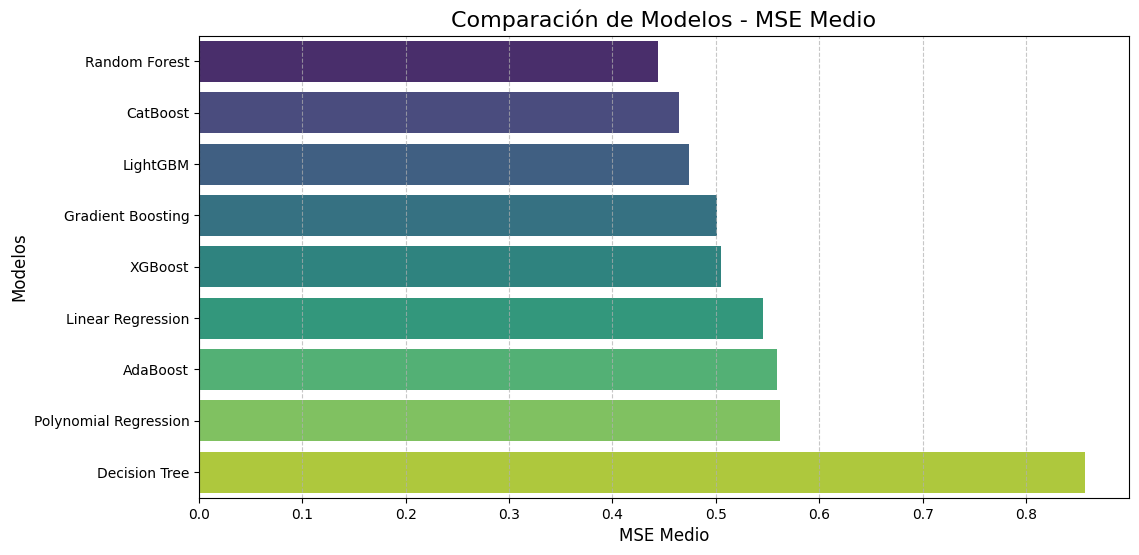

Evaluando modelo: Linear Regression...
Evaluando modelo: Decision Tree...
Evaluando modelo: Random Forest...
Evaluando modelo: Gradient Boosting...
Evaluando modelo: AdaBoost...
Evaluando modelo: XGBoost...
Evaluando modelo: LightGBM...
Evaluando modelo: CatBoost...
Evaluando modelo: Polynomial Regression...

El modelo ganador es: Random Forest con un MSE medio de 0.4437

                  Modelo  MSE Medio
2          Random Forest   0.443733
7               CatBoost   0.464724
6               LightGBM   0.473959
3      Gradient Boosting   0.500748
5                XGBoost   0.505387
0      Linear Regression   0.545684
4               AdaBoost   0.559377
8  Polynomial Regression   0.561921
1          Decision Tree   0.856855


C:\Users\rodri\AppData\Local\Temp\ipykernel_16592\266398706.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSE Medio", y="Modelo", data=resultados_df, palette="viridis", hue=None)


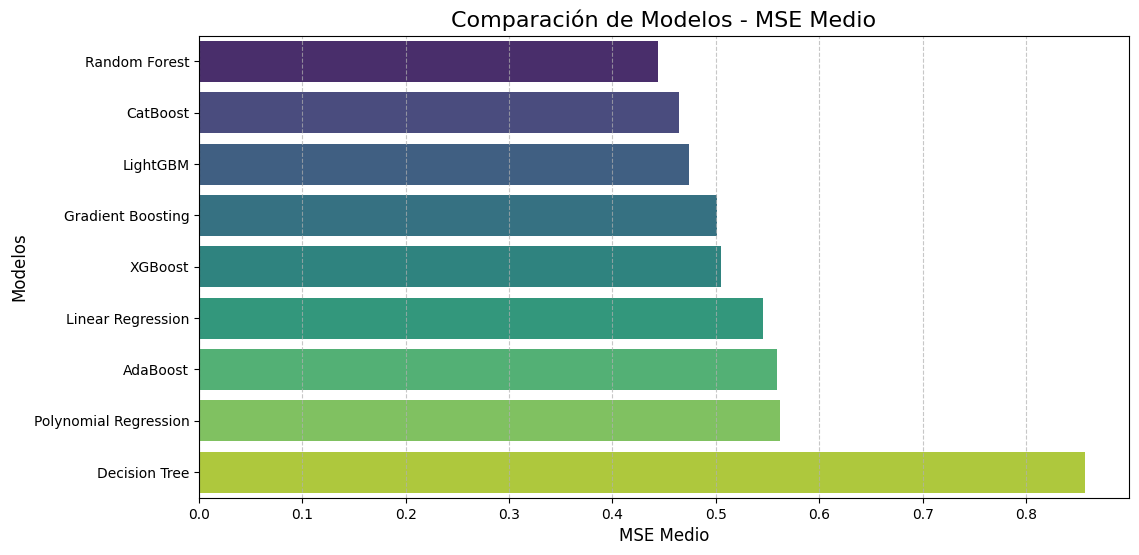

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

# Definir los modelos de regresión (sin Ridge, Lasso, SVR, KNN)
model_names = [
    "Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", 
    "AdaBoost", "XGBoost", "LightGBM", "CatBoost", "Polynomial Regression"
]

model_set = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    XGBRegressor(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    LGBMRegressor(random_state=42),
    CatBoostRegressor(random_state=42, verbose=False),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  # Regresión polinómica (grado 2)
]

# Evaluar modelos con cross-validation
metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(f"Evaluando modelo: {nombre}...")
    try:
        # Calcular cross-validation para regresión con MSE
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
        metricas_cv[nombre] = scores
        valores.append(np.mean(scores))  # Guardar el valor promedio
    except Exception as e:
        print(f"Error con el modelo {nombre}: {e}")
        metricas_cv[nombre] = None
        valores.append(-np.inf)

# Encontrar el modelo ganador (el que tiene el menor error cuadrático medio negativo)
ganador = model_names[np.argmax(valores)]  # Maximizamos el valor negativo, lo que implica minimización del error
print(f"\nEl modelo ganador es: {ganador} con un MSE medio de {-np.max(valores):.4f}\n")

# Mostrar los resultados en un DataFrame
resultados_df = pd.DataFrame({
    "Modelo": model_names,
    "MSE Medio": -np.array(valores)  # Convertir el MSE negativo a positivo
}).sort_values(by="MSE Medio", ascending=True)  # Ordenar de menor a mayor MSE

print(resultados_df)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="MSE Medio", y="Modelo", data=resultados_df, palette="viridis", hue=None)
plt.title("Comparación de Modelos - MSE Medio", fontsize=16)
plt.xlabel("MSE Medio", fontsize=12)
plt.ylabel("Modelos", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# Definir los modelos de regresión (sin Ridge, Lasso, SVR, KNN)
model_names = [
    "Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", 
    "AdaBoost", "XGBoost", "LightGBM", "CatBoost", "Polynomial Regression"
]

model_set = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    XGBRegressor(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    LGBMRegressor(random_state=42),
    CatBoostRegressor(random_state=42, verbose=False),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  # Regresión polinómica (grado 2)
]

# Evaluar modelos con cross-validation
metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(f"Evaluando modelo: {nombre}...")
    try:
        # Calcular cross-validation para regresión con MSE
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
        metricas_cv[nombre] = scores
        valores.append(np.mean(scores))  # Guardar el valor promedio
    except Exception as e:
        print(f"Error con el modelo {nombre}: {e}")
        metricas_cv[nombre] = None
        valores.append(-np.inf)

# Encontrar el modelo ganador (el que tiene el menor error cuadrático medio negativo)
ganador = model_names[np.argmax(valores)]  # Maximizamos el valor negativo, lo que implica minimización del error
print(f"\nEl modelo ganador es: {ganador} con un MSE medio de {-np.max(valores):.4f}\n")

# Mostrar los resultados en un DataFrame
resultados_df = pd.DataFrame({
    "Modelo": model_names,
    "MSE Medio": -np.array(valores)  # Convertir el MSE negativo a positivo
}).sort_values(by="MSE Medio", ascending=True)  # Ordenar de menor a mayor MSE

print(resultados_df)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="MSE Medio", y="Modelo", data=resultados_df, palette="viridis", hue=None)
plt.title("Comparación de Modelos - MSE Medio", fontsize=16)
plt.xlabel("MSE Medio", fontsize=12)
plt.ylabel("Modelos", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [29]:

# Espacios de búsqueda para cada modelo (ajustados para regresión)
parametros = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    "CatBoost": {
        'iterations': [100, 200, 300],
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'l2_leaf_reg': [3, 5, 7]
    },
    "LightGBM": {
        'num_leaves': [50, 75, 100],  
        'learning_rate': [0.01, 0.05, 0.1],  
        'n_estimators': [200, 250, 300],  
        'max_depth': [10, 12, 16]  
    }
}

# Definir modelos de regresión
modelos = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=False),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Ajuste de hiperparámetros con GridSearchCV
resultados_ajuste = {}
for nombre, modelo in modelos.items():
    print(f"Optimización de hiperparámetros para {nombre}...")
    grid_search = GridSearchCV(
        estimator=modelo,
        param_grid=parametros[nombre],
        cv=3,  # Validación cruzada
        scoring='neg_mean_squared_error',  # Para regresión se utiliza el MSE negativo
        n_jobs=-1  # Paralelización
    )
    grid_search.fit(X_train_scaled, y_train)
    resultados_ajuste[nombre] = grid_search

    # Mostrar los mejores resultados
    print(f"Mejores hiperparámetros para {nombre}: {grid_search.best_params_}")
    print(f"Mejor MSE en validación cruzada: {grid_search.best_score_:.4f}")

# Guardar los modelos optimizados
modelos_optimizados = {nombre: resultados_ajuste[nombre].best_estimator_ for nombre in resultados_ajuste}

# Mostrar los mejores resultados de cada modelo
for nombre, modelo in modelos_optimizados.items():
    print(f"Modelo optimizado para {nombre}: {modelo}")


Optimización de hiperparámetros para Random Forest...
Mejores hiperparámetros para Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor MSE en validación cruzada: -0.4403
Optimización de hiperparámetros para CatBoost...
Mejores hiperparámetros para CatBoost: {'depth': 10, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Mejor MSE en validación cruzada: -0.4452
Optimización de hiperparámetros para LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 10
[LightGBM] [Info] Start training from score 5.827279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [33]:
from sklearn.metrics import mean_squared_error, r2_score



# Evaluar cada modelo en el conjunto de test
for nombre, modelo in modelos_optimizados.items():
    print(f"\n🔹 Evaluación en Test para {nombre}...")
    
    # Predecir valores en el conjunto de test
    y_pred_test = modelo.predict(X_test_scaled)

    # Calcular métricas de regresión
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # RMSE
    r2 = r2_score(y_test, y_pred_test)

    # Imprimir resultados
    print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
    print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"📈 R² Score: {r2:.4f}")



🔹 Evaluación en Test para Random Forest...
📉 Mean Squared Error (MSE): 0.4411
📊 Root Mean Squared Error (RMSE): 0.6642
📈 R² Score: 0.4020

🔹 Evaluación en Test para CatBoost...
📉 Mean Squared Error (MSE): 0.4379
📊 Root Mean Squared Error (RMSE): 0.6617
📈 R² Score: 0.4064

🔹 Evaluación en Test para LightGBM...
📉 Mean Squared Error (MSE): 0.4696
📊 Root Mean Squared Error (RMSE): 0.6853
📈 R² Score: 0.3634


c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


📉 Mean Squared Error (MSE): 0.4379
📊 Root Mean Squared Error (RMSE): 0.6617
📈 R² Score: 0.4064


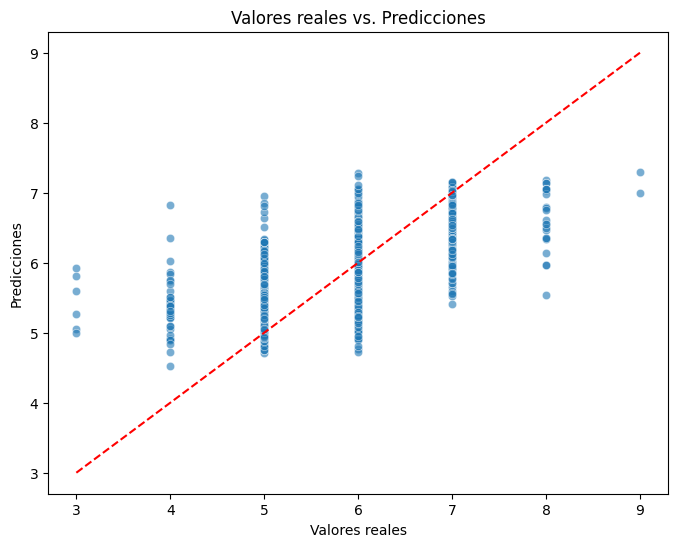

In [35]:

# Definir y entrenar el modelo
best_model = CatBoostRegressor(
    depth=10, iterations=300, l2_leaf_reg=3, learning_rate=0.1, verbose=False, random_state=42
)
best_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = best_model.predict(X_test_scaled)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

# Visualización de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()


                Feature  Importance
8               alcohol   15.587580
1      volatile_acidity   13.474177
7             sulphates   11.496793
4  total_sulfur_dioxide   11.284467
6                    pH   10.272285
2           citric_acid   10.057170
0         fixed_acidity    9.311433
5               density    9.204190
3             chlorides    8.072511
9                 class    1.239393


C:\Users\rodri\AppData\Local\Temp\ipykernel_16592\1891271485.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


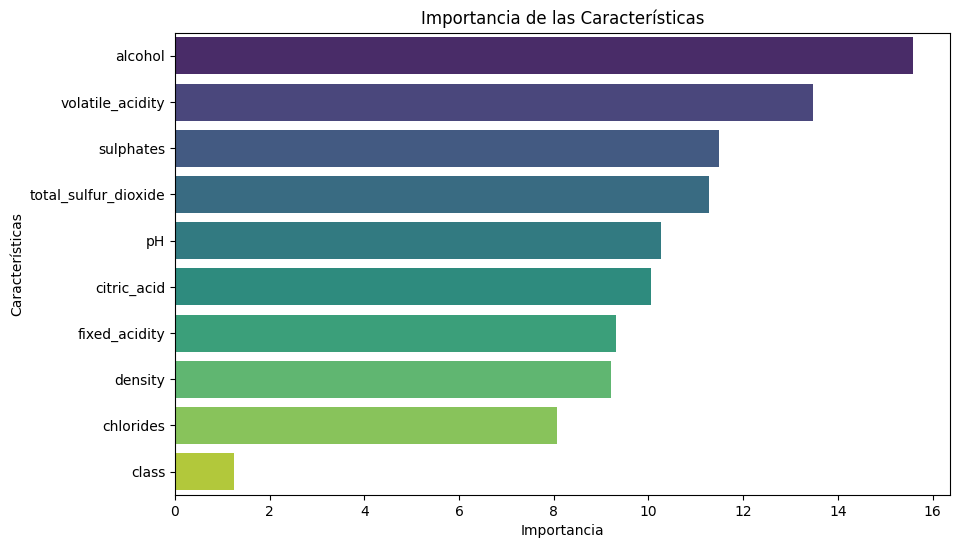

In [36]:
# Obtener la importancia de las características
feature_importance = best_model.get_feature_importance()
features = X_train.columns  # Asegúrate de que X_train tiene los nombres originales

# Crear un DataFrame con la importancia de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Ordenar de mayor a menor importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar la importancia de las características
print(importance_df)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


In [37]:
columnas = X_train.columns  # Guardamos los nombres de las columnas originales
X_train_reduced = pd.DataFrame(X_train_scaled, columns=columnas).drop(columns=['class'])
X_test_reduced = pd.DataFrame(X_test_scaled, columns=columnas).drop(columns=['class'])

In [38]:
# Verifica el número de muestras en X_train_reduced
n_samples = len(X_train_reduced)
print(f"Cantidad de muestras en el conjunto de entrenamiento: {n_samples}")

# Ajustar el valor de k_neighbors a un número adecuado
smote = SMOTE(random_state=42, k_neighbors=min(2, n_samples - 1))

# Aplica SMOTE tanto a las características (X) como a la variable objetivo (y)
X_train_res, y_train_res = smote.fit_resample(X_train_reduced, y_train)

# Verifica la distribución de clases después de SMOTE
print(f"Distribución de clases en y_train después de SMOTE: {pd.Series(y_train_res).value_counts()}")

Cantidad de muestras en el conjunto de entrenamiento: 4157
Distribución de clases en y_train después de SMOTE: quality
6    1796
7    1796
5    1796
3    1796
8    1796
4    1796
9    1796
Name: count, dtype: int64


📉 Mean Squared Error (MSE): 0.5508
📊 Root Mean Squared Error (RMSE): 0.7422
📈 R² Score: 0.2533


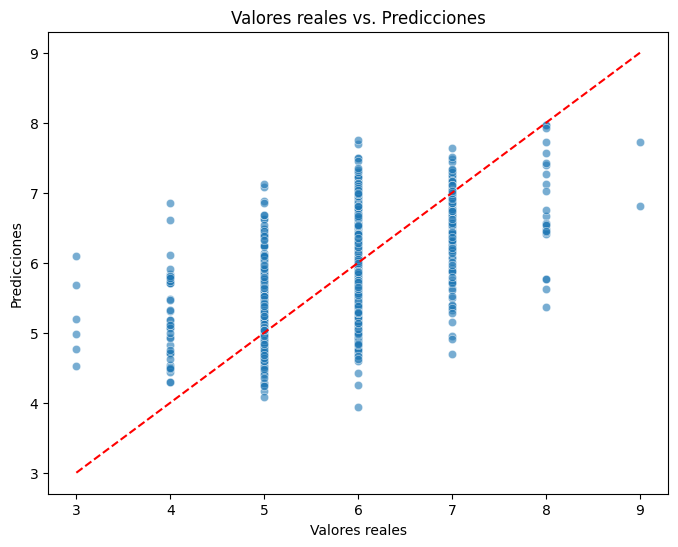

In [40]:

# Definir y entrenar el modelo
best_model = CatBoostRegressor(
    depth=10, iterations=300, l2_leaf_reg=3, learning_rate=0.1, verbose=False, random_state=42
)
best_model.fit(X_train_res, y_train_res)

# Predicciones
y_pred = best_model.predict(X_test_reduced)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

# Visualización de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()
